In [4]:
# channel이 3인 이미지 데이터를 convolution 연산하는 코드

import numpy as np
import tensorflow as tf

# 입력데이터의 형태
# (이미지의 개수, 이미지의 height, 이미지의 width, channel)
# (1,3,3,3)
image = np.array([[[[1,2,3],
                   [1,2,3],
                   [1,2,3]],
                  [[1,2,3],
                   [1,2,3],
                   [1,2,3]],
                  [[1,2,3],
                   [1,2,3],
                   [1,2,3]]]], dtype=np.float64)
print(image.shape)

(1, 3, 3, 3)


In [5]:
# filter의 형태
# (filter의 height, filter의 width, filter의 channel, filter의 개수)
# (2,2,3,2)
weight = np.array([[[[1,2],
                    [1,2],
                    [1,2]],
                    [[1,2],
                    [1,2],
                    [1,2]]],
                    [[[1,2],
                     [1,2],
                     [1,2]],
                    [[1,2],
                    [1,2],
                    [1,2]]]], dtype=np.float64)
print(weight.shape) # (2, 2, 3, 2)

(2, 2, 3, 2)


In [6]:
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print(result)


[[[[24. 48.]
   [24. 48.]]

  [[24. 48.]
   [24. 48.]]]]


<class 'numpy.ndarray'>
(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)
(427, 638, 1)


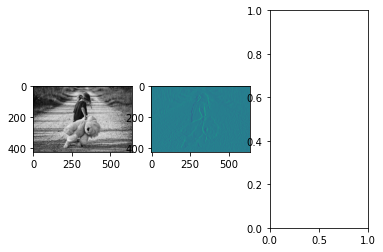

In [23]:
# 이미지 이용해서 하기
import matplotlib.pyplot as plt
import matplotlib.image as img

figure = plt.figure()

ax1 = figure.add_subplot(1,2,1)
ax2 = figure.add_subplot(1,2,2)

ori_img = img.imread('./data/images/girl-teddy.jpg')
print(type(ori_img))  # <class 'numpy.ndarray'>
print(ori_img.shape)  # (429, 640, 3)

ax1.imshow(ori_img)

# 입력이미지의 형태
# (1, 429, 640, 3)
input_image = ori_img.reshape((1,)+ori_img.shape)
print(input_image.shape)   # (1, 429, 640, 3)
input_image = input_image.astype(np.float32)  # 데이터를 실수로 변환

# 이미지의 channel을 1채널로 변경
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape)  #(1, 429, 640, 1)

#filter
#(3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                 [[[-1]],[[0]],[[1]]]])
print(weight.shape)   #(3, 3, 1, 1)

# stride = 1
# padding = 'VALID'
conv2d = tf.nn.conv2d(channel_1_input_image,
                     weight, strides=[1,1,1,1],
                     padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print(result.shape)     # (1, 427, 638, 1)
                        # (이미지 개수 , feature map의 세로길이, feature map의 가로길이, filter 개수)      

t_img = result[0,:,:,:]
print(t_img.shape)  # (427, 638, 1)
ax2.imshow(t_img)
# filter를 거쳐서 특징을 뽑음
# 사진의 윤곽이 표시됨

<class 'numpy.ndarray'>
(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)
(427, 638, 1)
(142, 212, 1)


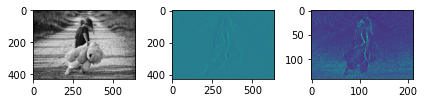

In [26]:
## pooling 하기

# 이미지 이용해서 하기
import matplotlib.pyplot as plt
import matplotlib.image as img

figure = plt.figure()

ax1 = figure.add_subplot(1,3,1)
ax2 = figure.add_subplot(1,3,2)
ax3 = figure.add_subplot(1,3,3)

ori_img = img.imread('./data/images/girl-teddy.jpg')
print(type(ori_img))  # <class 'numpy.ndarray'>
print(ori_img.shape)  # (429, 640, 3)

ax1.imshow(ori_img)

# 입력이미지의 형태
# (1, 429, 640, 3)
input_image = ori_img.reshape((1,)+ori_img.shape)
print(input_image.shape)   # (1, 429, 640, 3)
input_image = input_image.astype(np.float32)  # 데이터를 실수로 변환

# 이미지의 channel을 1채널로 변경
channel_1_input_image = input_image[:,:,:,0:1]
print(channel_1_input_image.shape)  #(1, 429, 640, 1)

#filter
#(3,3,1,1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                 [[[-1]],[[0]],[[1]]]])
print(weight.shape)   #(3, 3, 1, 1)

# stride = 1
# padding = 'VALID'
conv2d = tf.nn.conv2d(channel_1_input_image,
                     weight, strides=[1,1,1,1],
                     padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print(result.shape)     # (1, 427, 638, 1)
                        # (이미지 개수 , feature map의 세로길이, feature map의 가로길이, filter 개수)      

t_img = result[0,:,:,:]
print(t_img.shape)  # (427, 638, 1)
ax2.imshow(t_img)
# 사진의 윤곽이 표시됨

# pooling 처리를 해보자!
pooling_result = tf.nn.max_pool(result,
                               ksize=[1,3,3,1],   # 3X3 kernel
                               strides=[1,3,3,1], # kernel size와 동일하게 설정
                               padding='VALID')
pool_img = sess.run(pooling_result)
pool_img = pool_img[0,:,:,:]
print(pool_img.shape)  
ax3.imshow(pool_img)
# max_pooling 처리를 하면 이미지 사이즈를 줄이면서 특징을 더 잘 뽑아낼수 있음

plt.tight_layout()
plt.show()

In [50]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

In [51]:
# 이제 mnist 예제를 이용해서 학습시킬 이미지들을 만들어보자!
# 갖고있는게 mnist.csv여서 일단 read_csv 하기
import pandas as pd
df = pd.read_csv('./data/mnist_train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1, 28, 28, 1)
(3, 3, 1, 4)
(1, 13, 13, 4)
(4, 13, 13, 1)


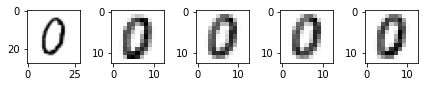

In [53]:
sess = tf.Session()
# subplot 생성하기
figure = plt.figure()
ax = list() # 빈 리스트

for i in range(5):
    ax.append(figure.add_subplot(1,5,i+1))

# 이미지 확인
img_data = df.drop('label', axis=1, inplace=False).values

ori_image = img_data[5:6].reshape(28,28)  # 2차원 이미지 형태
ax[0].imshow(ori_image, cmap='Greys')

########################################

# 입력이미지
# (1, 28, 28, 1) => (이미지 개수, height, width, channel)
input_image = ori_image.reshape((1,)+ori_image.shape+(1,))
print(input_image.shape)   # (1, 28, 28, 1)
input_image = input_image.astype(np.float32)  # 데이터를 실수로 변환

# filter
# (3,3,1,4) -> (height,width,channel,filter개수)
# rand() -> 0과 1사이의 난수 발생
weight = np.random.rand(3,3,1,4)
print(weight.shape)    # (3, 3, 1, 4)

# convolution연산 수행
conv2d = tf.nn.conv2d(input_image,
                     weight,
                     strides=[1,1,1,1],
                     padding='VALID')
conv2d_result = sess.run(conv2d)

# relu 처리하기
relu_ = tf.nn.relu(conv2d_result)
result_result = sess.run(relu_)  # relu 처리 결과

# pooling 처리하기
pool = tf.nn.max_pool(result_result,
                     ksize=[1,2,2,1],
                     strides=[1,2,2,1],
                     padding='VALID')

pool_result = sess.run(pool)
print(pool_result.shape)  #(1, 13, 13, 4)

# 1과 4의 위치를 swap (1인 경우에만 가능)
i = np.swapaxes(pool_result,0,3)
print(i.shape)    #(4, 13, 13, 1)

for idx, image in enumerate(i):
    ax[idx+1].imshow(image.squeeze(), cmap='Greys')
    
plt.tight_layout()
plt.show()

In [59]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

tf.reset_default_graph()

In [66]:
#data loading
df = pd.read_csv('./data/mnist_train.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# 결측치와 이상치는 없음
# data split
train_x_data, test_x_data, train_t_data, test_t_data = \
train_test_split(df.drop('label',axis=1,inplace=False),
                df['label'],
                test_size=0.3,
                random_state=1,
                stratify=df['label'])

# x_data에 대한 정규화 처리
scaler = MinMaxScaler()
scaler.fit(train_x_data)
norm_train_x_data = scaler.transform(train_x_data)
norm_test_x_data = scaler.transform(test_x_data)

# t_data에 대해서는 one-hot encoding 처리
sess = tf.Session()
onehot_train_t_data = sess.run(tf.one_hot(train_t_data, depth=10))
onehot_test_t_data = sess.run(tf.one_hot(test_t_data, depth=10))

In [68]:
# tensorflow 구현

# placeholder 
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
T = tf.placeholder(shape=[None,10], dtype=tf.float32)

# 입력 x데이터의 shape을 변경해서 넣어야함
x_img = tf.reshape(X,[-1,28,28,1])  #(이미지 개수, height, width, channel)

# convolution layer 처리
# filter의 shape => (height, width, channel, filter 개수)
W2 = tf.Variable(tf.random.normal([3,3,1,32]))
L1 = tf.nn.conv2d(x_img, W2, strides=[1,1,1,1],padding='SAME')
L1 = tf.nn.relu(L1)
print('L1의 결과 데이터 shape : ',L1.shape)
# L1의 결과 데이터 shape :  (?, 28, 28, 32)

# pooling 처리
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print('L1의 pooling 결과 데이터 shape: ',L1.shape)
# L1의 pooling 결과 데이터 shape:  (?, 14, 14, 32)

# 2번째 convolution layer
W3 = tf.Variable(tf.random.normal([3,3,32,64]))
L2 = tf.nn.conv2d(L1, W3, strides=[1,1,1,1],padding='SAME')
L2 = tf.nn.relu(L2)
print('L2의 결과 데이터 shape : ',L2.shape)
# L2의 결과 데이터 shape :  (?, 14, 14, 64)

# pooling 처리
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
print('L2의 pooling 결과 데이터 shape: ',L2.shape)
# L2의 pooling 결과 데이터 shape:  (?, 7, 7, 64)

# 이렇게 해서 나온 데이터를 DNN에 넣어서 학습
L2 = tf.reshape(L2, [-1, 7*7*64])

# weight & bias 
W4 = tf.get_variable('W4', shape=[7*7*64,256],
                    initializer=tf.contrib.layers.variance_scaling_initializer())
b4 = tf.Variable(tf.random.normal([256]))

_layer3 = tf.matmul(L2, W4) +b4
layer3 = tf.nn.relu(_layer3)
layer3 = tf.nn.dropout(layer3, rate=0.3)

W5 = tf.get_variable('W5', shape=[256,10],
                    initializer=tf.contrib.layers.variance_scaling_initializer())
b5 = tf.Variable(tf.random.normal([10]))

# hypothesis, model
logit = tf.matmul(layer3,W5) +b5
H = tf.nn.softmax(logit)

#loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,
                                                                labels=T))

#train 
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(loss)

# session 초기화
sess.run(tf.global_variables_initializer())

# 반복학습(원래 batch 처리해야함)
for step in range(10):
    tmp, loss_val = sess.run([train, loss],
                            feed_dict ={X:norm_train_x_data,
                                        T:onehot_train_t_data})

    print('loss value : ',loss_val)
    

L1의 결과 데이터 shape :  (?, 28, 28, 32)
L1의 pooling 결과 데이터 shape:  (?, 14, 14, 32)
L2의 결과 데이터 shape :  (?, 14, 14, 64)
L2의 pooling 결과 데이터 shape:  (?, 7, 7, 64)
loss value :  46.936474
loss value :  56.178738
loss value :  45.841328
loss value :  40.047474
loss value :  31.00018
loss value :  16.33556
loss value :  7.1649365
loss value :  4.517737
loss value :  3.6196768
loss value :  2.6042645
